6. Object detection using Transfer Learning of CNN architectures
<br>
a. Load in a pre-trained CNN model trained on a large dataset
<br>
b. Freeze parameters (weights) in model’s lower convolutional layers
<br>
c. Add custom classifier with several layers of trainable parameters to model
<br>
d. Train classifier layers on training data available for task
<br>
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Pre processing img data 

In [24]:
dataset_dir = "caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


#### Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [27]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [30]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
#base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [33]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [36]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [39]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.1549 - loss: 4.2150 - val_accuracy: 0.2880 - val_loss: 3.3954
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.3601 - loss: 3.0663 - val_accuracy: 0.3895 - val_loss: 2.9515
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.4794 - loss: 2.5015 - val_accuracy: 0.4645 - val_loss: 2.6238
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.5315 - loss: 2.1264 - val_accuracy: 0.4810 - val_loss: 2.3922
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.5989 - loss: 1.8021 - val_accuracy: 0.4940 - val_loss: 2.2522
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6552 - loss: 1.5589 - val_accuracy: 0.5295 - val_loss: 2.1193
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.7088 - loss: 1.3700 - val_accuracy: 0.5410 - val_loss: 2.0372
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.7747 - loss: 1.1627 - val_accuracy: 0.5495 - v

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [41]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.2598 - loss: 3.6736 - val_accuracy: 0.4830 - val_loss: 2.3553
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.5642 - loss: 1.8405 - val_accuracy: 0.5640 - val_loss: 1.8648
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.6991 - loss: 1.1909 - val_accuracy: 0.5845 - val_loss: 1.7438
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.7909 - loss: 0.7431 - val_accuracy: 0.6065 - val_loss: 1.6999
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.8914 - loss: 0.4444 - val_accuracy: 0.6100 - val_loss: 1.7318
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.9243 - loss: 0.2763 - val_accuracy: 0.6360 - val_loss: 1.7011
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.9505 - loss: 0.1814 - val_accuracy: 0.6350 - val_loss: 1.8146
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.9797 - loss: 0.1012 - val_accuracy: 0.6360 - va

In [43]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 913ms/step


In [45]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  revolver
Actual:  revolver


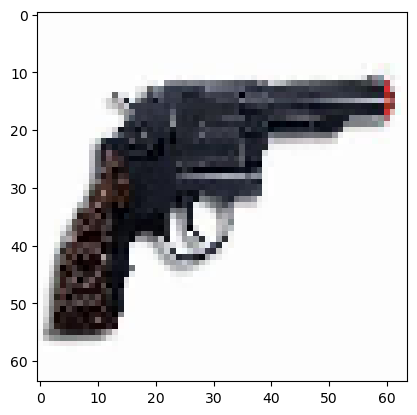

In [47]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])